## Logistic Regression model on HR_Analytics(Employee Retention) Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isnull().sum()    #there are no null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
df['average_montly_hours'].max()

310

In [5]:
df['average_montly_hours'].min()

96

In [42]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [43]:
df['left'].unique()

array([1, 0], dtype=int64)

In [44]:
d_left=df[df['left']==1]  #creating a data frame for employee who left the job
d_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [45]:
#total number of employees left the job
len(d_left['left']==1)

3571

Here is shown a computation in regard Employees who left with salary low are

In [46]:
df_low=d_left[d_left['salary']=='low']  #creating new data frame for employees with low salary
df_low.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [47]:
len(df_low[df_low['left']==1])   #total number of employees left with salary low

2172

In [48]:
len(df_low[df_low['satisfaction_level']<=0.50])  #employees left with satisfaction_level <= 0.50

1554

In [49]:
len(df_low[df_low['satisfaction_level']>0.50])  #employees left with satisfaction level > 0.50

618

In [50]:
len(df_low[df_low['average_montly_hours']>203])  #employees left with average_montly_hours <= 203

1145

In [18]:
len(df_low[df_low['average_montly_hours']<=203])  #employees left with average_montly_hours > 203

1027

Here is shown a computation in regard Employees who left with salary high are

In [19]:
df_high=d_left[d_left['salary']=='high']   #creating data frame for employees left with salary high
df_high.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high


In [20]:
len(df_high[df_high['left']==1]) #total number of employes left with high salary

82

In [21]:
len(df_high[df_high['satisfaction_level']<=0.50])  #employees left with satisfaction_level <= 0.50

64

In [22]:
len(df_high[df_high['satisfaction_level']>0.50])   #employee left with satisfaction level > 0.50

18

In [23]:
len(df_high[df_high['average_montly_hours']>203])  #employees left with average_montly_hours <= 203

32

In [24]:
len(df_high[df_high['average_montly_hours']<=203])  #employees left with average_montly_hours > 203

50

Here is shown a computation in regard Employees who left with salary medium are

In [25]:
df_medium=d_left[d_left['salary']=='medium']
df_medium.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [26]:
len(df_medium[df_medium['left']==1])     #total number of employees left with salary medium

1317

In [27]:
len(df_medium[df_medium['satisfaction_level']<=0.50])  #employees left with satisfaction level > 0.50

932

In [28]:
len(df_medium[df_medium['satisfaction_level']>0.50])   #employees left with satisfaction level > 0.50

385

In [29]:
len(df_medium[df_medium['average_montly_hours']<=203])  #employees left with average_montly_hours <= 203

582

In [30]:
len(df_medium[df_medium['average_montly_hours']>203])    #employees left with average_montly_hours > 203

735

Number of emloyee who did not left the job

In [33]:
15000-(2172+82+1317)

11429

Now we will analyse the data through various kinds of plots

<AxesSubplot:xlabel='salary'>

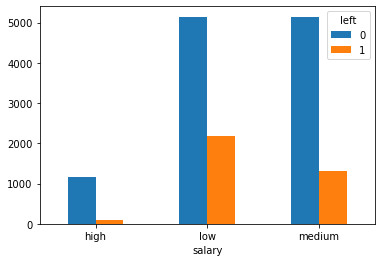

In [34]:
pd.crosstab(df.salary,df.left).plot.bar(rot=0)

<AxesSubplot:xlabel='satisfaction_level'>

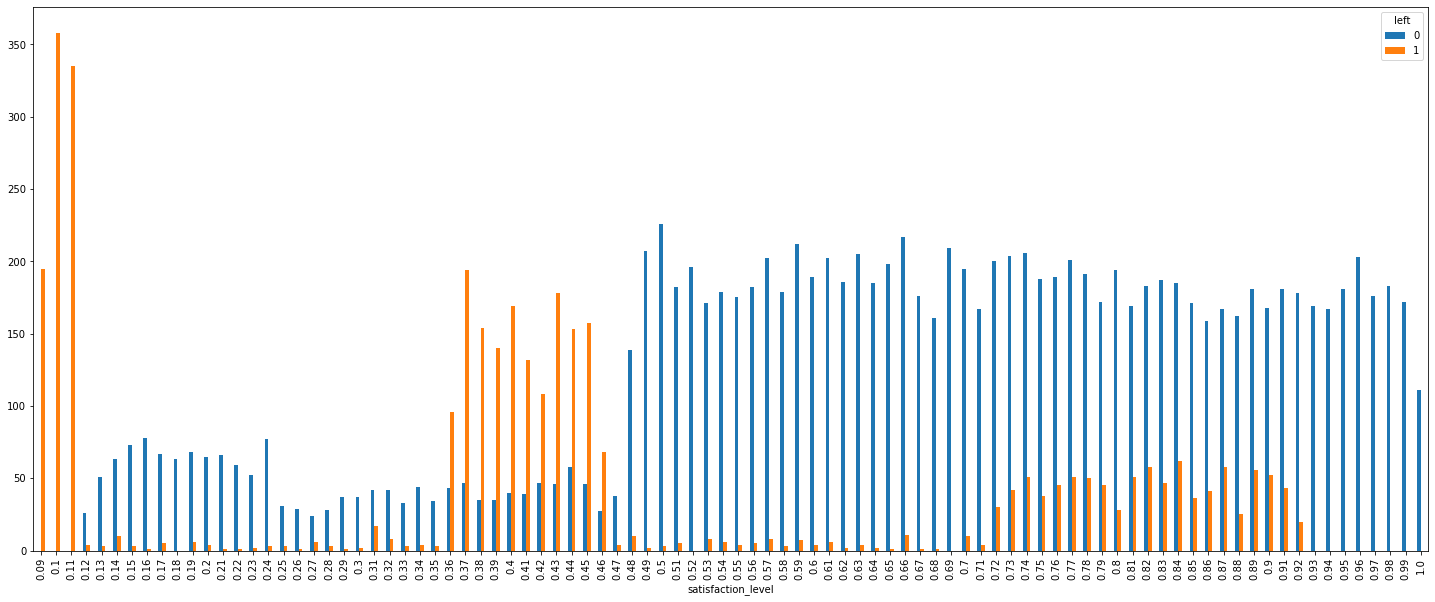

In [35]:
pd.crosstab(df.satisfaction_level,df.left).plot.bar(figsize=(25,10))

<AxesSubplot:xlabel='average_montly_hours'>

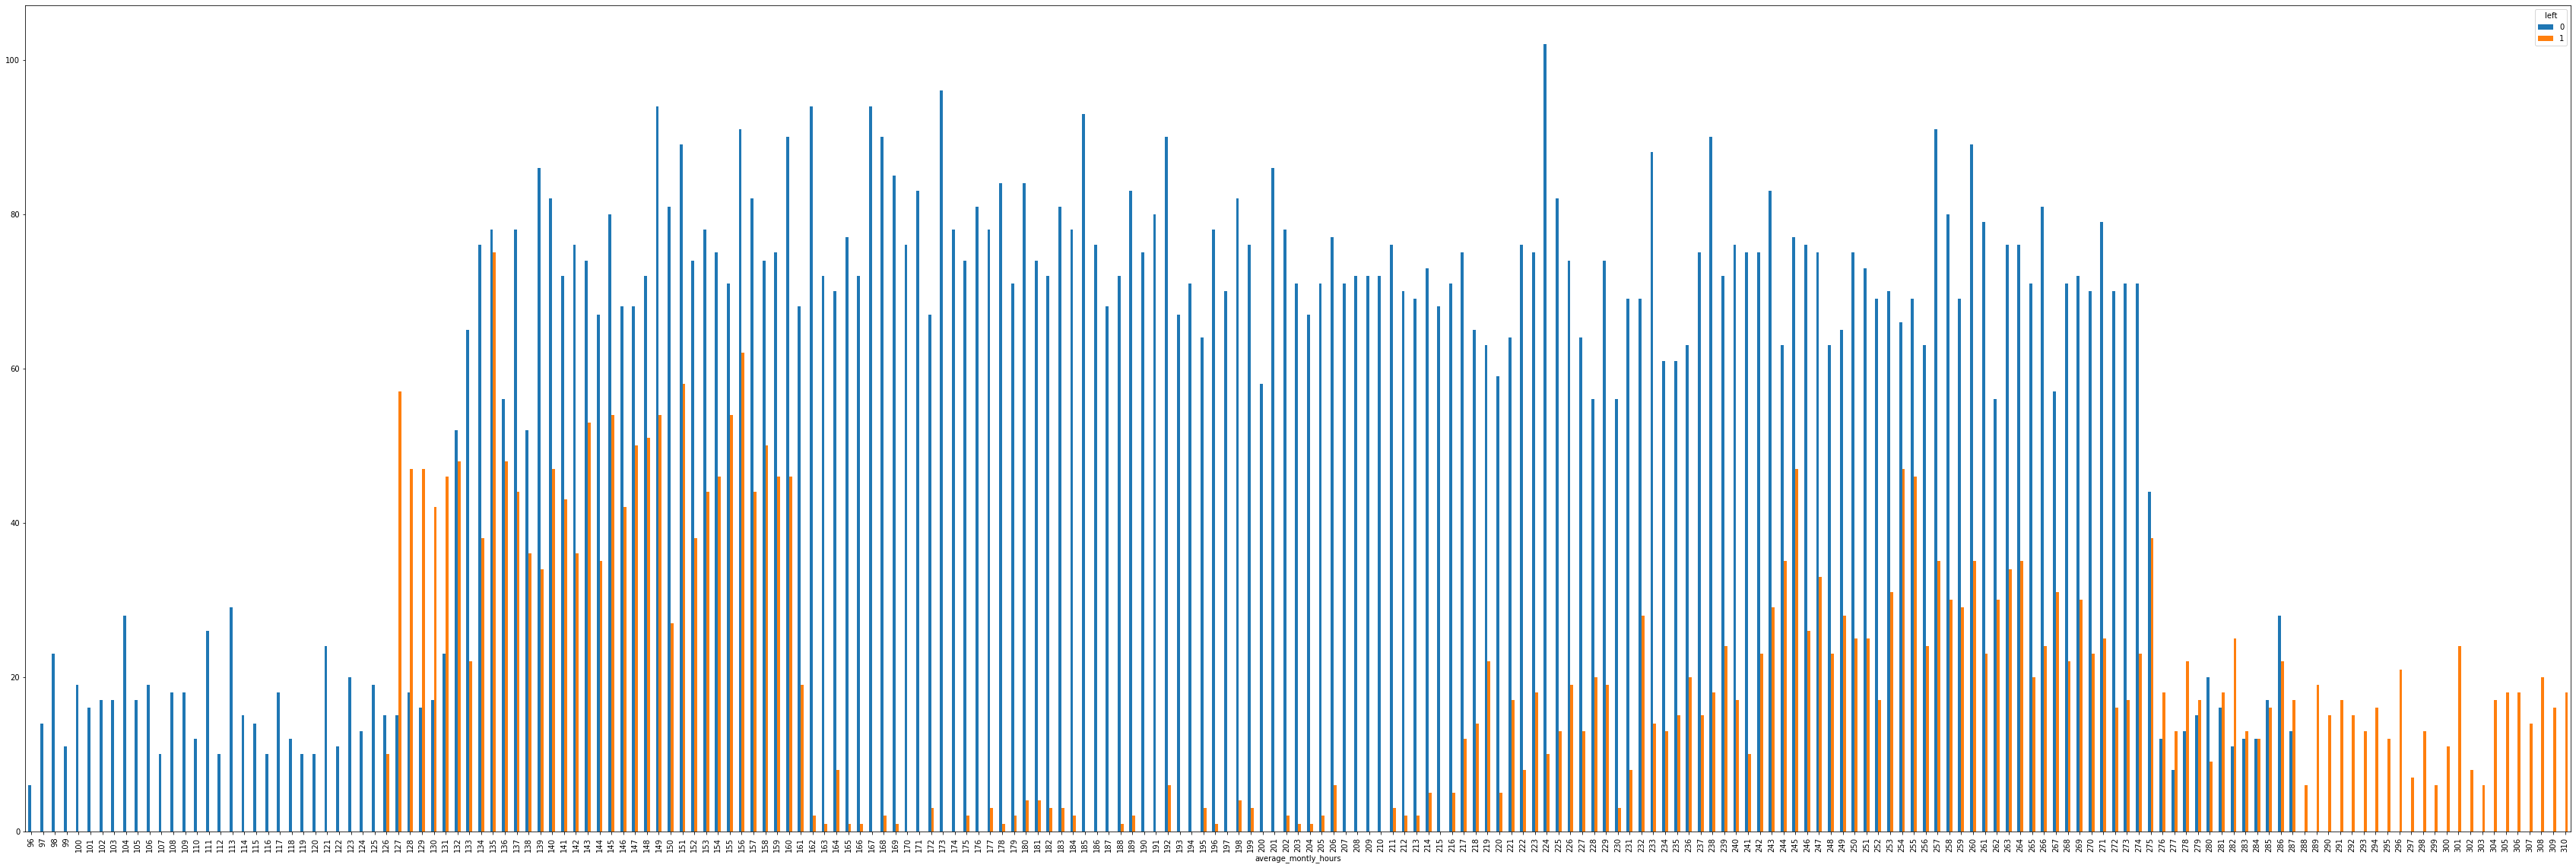

In [41]:
pd.crosstab(df.average_montly_hours,df.left).plot.bar(figsize=(60,20))

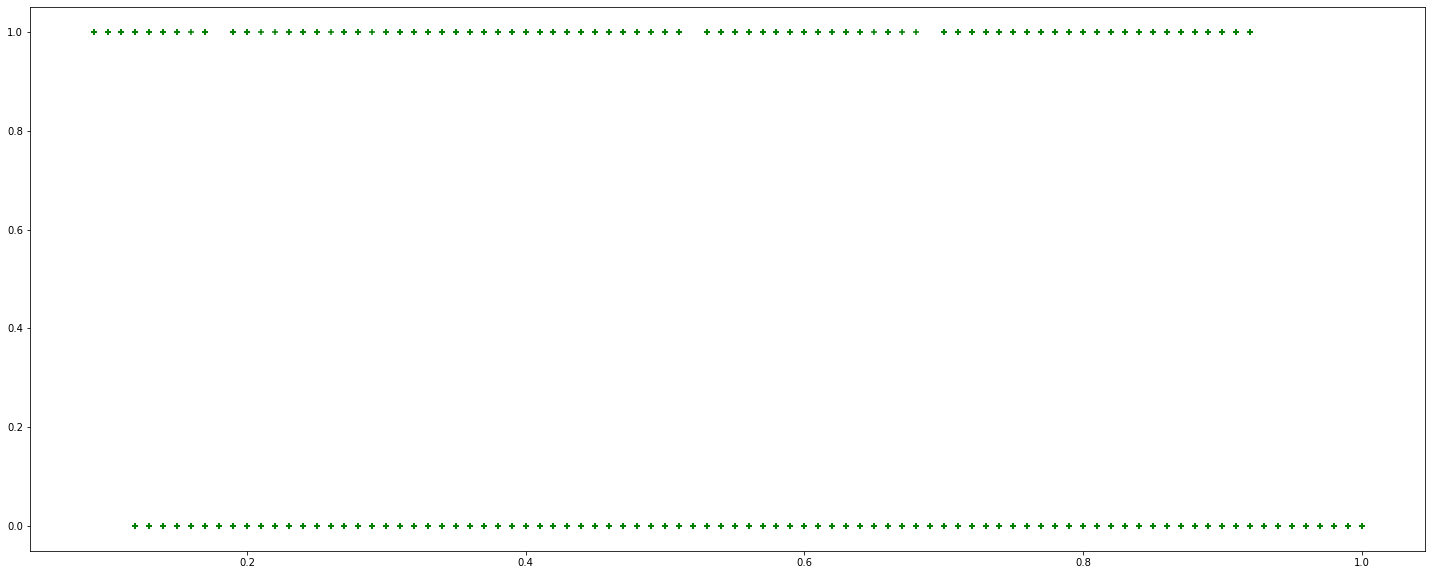

In [35]:
plt.figure(figsize=(25,10))
plt.scatter(df['satisfaction_level'],df['left'],marker='+',color='green')

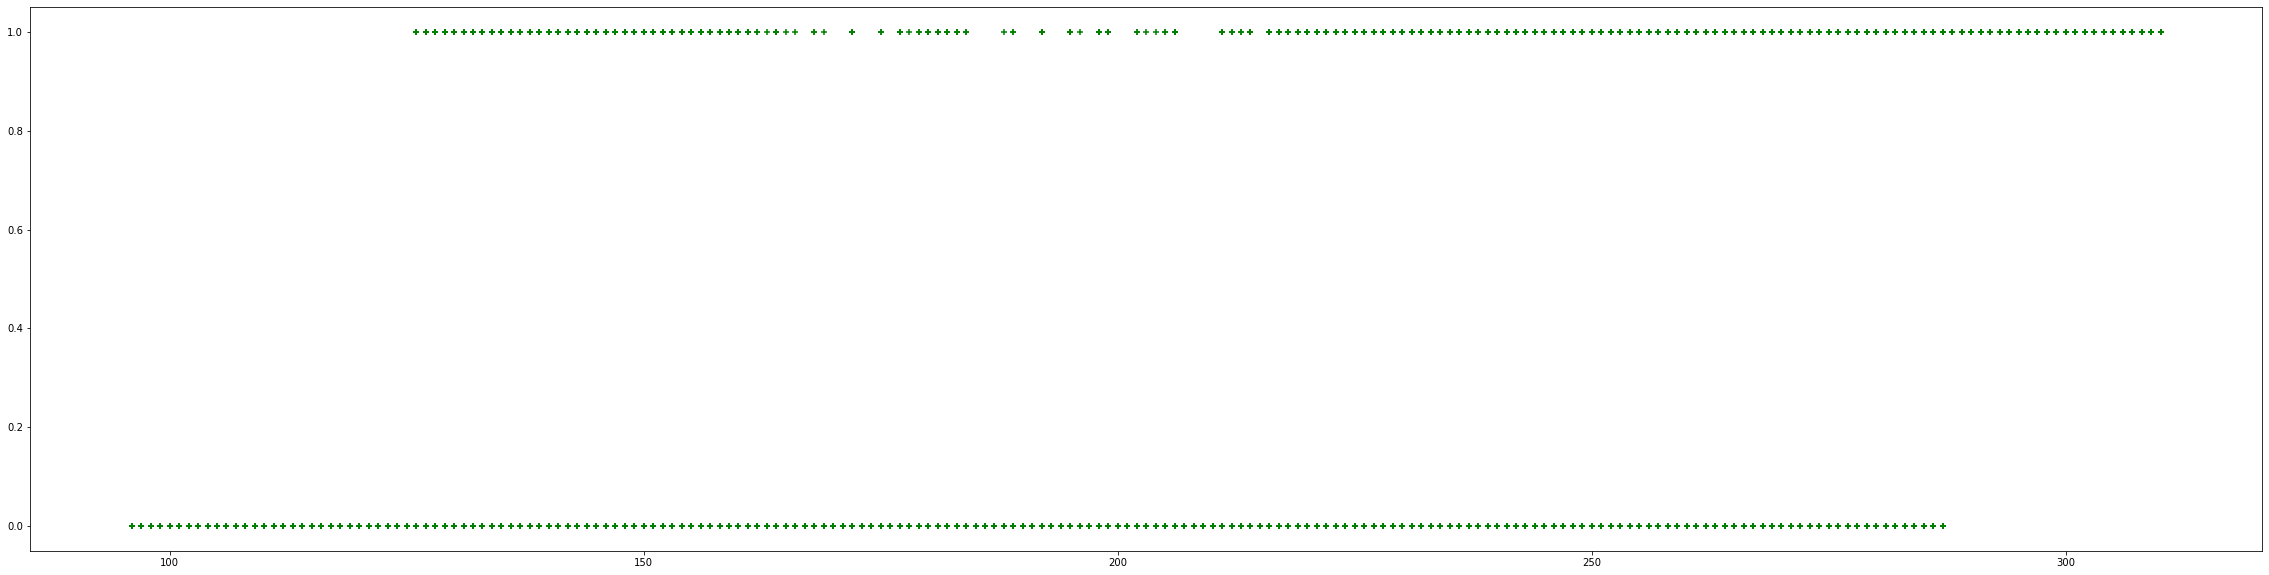

In [36]:
plt.figure(figsize=(40,10))
plt.scatter(df['average_montly_hours'],df['left'],marker='+',color='green')

From the above analysis and plots we may consider 'satisfaction_level' and 'average_monthly_hours' and 'salary' as the factors responsible for the employee retention. Also from the above scatter plots we can apply Logistic Regression algorithm for this problem.

In [37]:
#Now we will convert the salary column into dummy variables so that we can train our model
dummy=pd.get_dummies(df.salary)
dummy.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [38]:
merged_df=pd.concat([df,dummy],axis='columns')   #merging the dummy variable columns with original data set
merged_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1


In [39]:
final_df=merged_df.drop(['salary','medium'],axis='columns')   
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1


In [110]:
X=final_df.drop(['last_evaluation','number_project','time_spend_company','Work_accident','left','promotion_last_5years','Department'],axis='columns')
X.head()

,satisfaction_level,average_montly_hours,high,low
0,0.38,157,0,1
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,1
4,0.37,159,0,1


In [111]:
y=final_df['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logistic_model=LogisticRegression()

In [114]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [125]:
X_train.head()

,satisfaction_level,average_montly_hours,high,low
12350,0.09,304,0,0
5444,0.49,188,0,0
7095,0.18,250,0,0
8676,0.60,175,0,1
11797,0.99,211,0,1


In [126]:
X_test.head()

,satisfaction_level,average_montly_hours,high,low
8537,0.44,210,0,0
11209,0.38,188,0,0
5280,0.53,135,0,0
9657,0.58,107,0,0
14382,0.41,160,0,1


In [127]:
y_train.head()

12350    1
5444     0
7095     0
8676     0
11797    0
Name: left, dtype: int64

In [128]:
y_test.head()

8537     0
11209    0
5280     0
9657     0
14382    1
Name: left, dtype: int64

In [129]:
if logistic_model.fit(X_train,y_train):
    print('Trained successfully')
else:
    print('Not trained')

Trained successfully


In [131]:
logistic_model.score(X_test,y_test)   #accuracy of the model

0.7742222222222223

In [132]:
logistic_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
logistic_model.predict([[0.25,310,0,1]])

array([1], dtype=int64)

In [82]:
logistic_model.predict([[0.90,125,0,0]])

array([0], dtype=int64)